# Example
# Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores.
# Simons owns and operated a national chain of women,s apparel stores.
# 5000 copies of an expensive 4-color sales catalog have been printed and each catalog includes a coupon that provides a   50 Dollar discount on purchases of 200 Dollars or more.
# The catalogs are expensive and Simmons would like to send them to only to those cusormers who have the highest probability of using the coupon.

#  Variables
# Management thinks that annaul spending at Simmons Stores and whether a customers has a Simmons Credit Card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon.
# Simmons conducted a Pilot study using a random sample of 50 Simmons
# credit card customers and 50 othewr customers who donot have a credit Simmons credit card.
# Simmons sent the catalog to each of the 100 customers selected.
# At the end of the test period, Simmons noted whether the cusotmer used the coupon or not?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('L_REG1.xlsx')
data.head()

,Customer,Spending,Card,Purchase
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
data.describe()

,Customer,Spending,Card,Purchase
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


# Numpy.unique(): This method gives the unique values in particular column.
# Series.value_counts(); returns object containing count of unique values.
# ravel(): It will return 1-D Array with all input array elements 

In [4]:
data['Purchase'].unique()

array([0, 1], dtype=int64)

In [5]:
data['Purchase'].value_counts()

0    60
1    40
Name: Purchase, dtype: int64

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [7]:
x=data[['Card','Spending']]
y=data['Purchase'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [8]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [10]:
y_predict_train=Lreg.predict(x_train)
y_predict_train


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [11]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)


array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [12]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [13]:
import statsmodels.api as sm
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jan 2020   Pseudo R-squ.:                  0.1012
Time:                        11:16:17   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Calculating Accuracy Score using Confusion Matrix


In [14]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.76

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)


array([[15,  1],
       [ 5,  4]], dtype=int64)

In [16]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print('True Negatives:',tn)
print('False Positives:',fp)
print('False Negatives:',fn)
print('True Positives:',tp)

True Negatives: 15
False Positives: 1
False Negatives: 5
True Positives: 4


# Generating Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



# Precision=tp/(tp+fp)
# Accuracy=(tp+tn)/(tp+tn+fn+fp)
# Recall=tp/(tp+tn)

In [19]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


In [21]:
Specificity=(tn)/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.94


In [23]:
Sensitivity=(tp)/(tp+fn)
print("Sensitivity= {:0.2f}".format(Sensitivity))

Sensitivity= 0.44


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_ROC_AUC1 = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

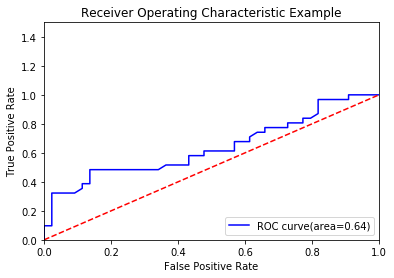

In [35]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve(area=%0.2f)'% roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()



In [30]:
log_ROC_AUC1 = roc_auc_score(y_test,y_predict)
fpr,tpr,thresholds1=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

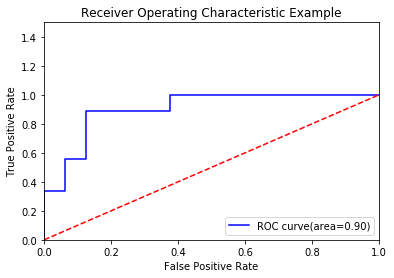

In [34]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.preprocessing import binarize
y_predict_class1=binarize(y_prob.reshape(1,-1),0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [37]:
y_predict_class1=y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [38]:
confusion_matrix_2=confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [39]:
y_predict_class2=binarize(y_prob.reshape(1,-1),0.5)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [40]:
confusion_matrix_3=confusion_matrix(y_test,y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [47]:
y_predict_class3=binarize(y_prob.reshape(1,-1),0.7)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
confusion_matrix_4=confusion_matrix(y_test,y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.metrics import roc_curve,auc

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
print("Area under ROC Curve: %f" % roc_auc)

Area under ROC Curve: 0.902778


In [57]:
import numpy as np
i=np.arange(len(tpr))
roc=pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),'1-fpr':pd.Series(1-fpr,index=i),'1-fpr':
                  pd.Series(1-fpr,index=i),'tf':pd.Series(tpr-(1-fpr),index=i),'thresholds':pd.Series(thresholds,index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


[]

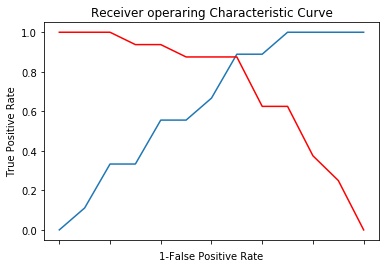

In [62]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operaring Characteristic Curve')
ax.set_xticklabels([])
         

In [63]:
y_predict_class4=binarize(y_prob.reshape(1,-1),0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [64]:
confusion_matrix_5=confusion_matrix(y_test,y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

